# Escolha e Treinamento do Modelo

Escolhemos 4 modelos:

* Binomial logistic regression

* Decision tree classifier

* Random forest classifier

* Gradient-boosted tree classifier

Importando bibliotecas

In [46]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.sql.functions import col, count
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier

Criando Sessão PySpark

In [40]:
spark = SparkSession.builder \
    .appName("Model-Selection-training") \
    .getOrCreate()

Lendo dataframe de treino

In [41]:
parquet_path = "/home/jovyan/work/data/clean-data/train-data/creditcard_2023.parquet"
train_df = spark.read.parquet(parquet_path)

Lendo dataframe de teste

In [42]:
parquet_path = "/home/jovyan/work/data/clean-data/test-data/creditcard_2023.parquet"
test_df = spark.read.parquet(parquet_path)

Função para Matriz de confusão 

In [43]:
def plot_confusion_matrix(predictions, model_name):
    pred_and_labels = predictions.select(
        col("prediction").cast("double"),
        col("Class").cast("double")
    ).rdd.map(tuple)

    metrics = MulticlassMetrics(pred_and_labels)
    matrix = metrics.confusionMatrix().toArray()

    df_cm = pd.DataFrame(matrix, index=range(len(matrix)), columns=range(len(matrix)))

    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Oranges", linewidths=0.5, cbar=False)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()

In [57]:
precision_evaluator = MulticlassClassificationEvaluator(labelCol = "Class", metricName = "weightedPrecision")

### Binomial logistic regression → Regressão Logística Binomial

Criar o modelo de regressão logística binomial

In [58]:
lr = LogisticRegression(featuresCol="features", labelCol="Class")

Construir o pipeline

In [59]:
pipeline_lr = Pipeline(stages=[assembler, lr])

Treinar o modelo

In [60]:
model_lr = pipeline_lr.fit(train_df)

Fazer previsões no conjunto de teste

In [61]:
predictions_lr = model_lr.transform(test_df)

Resultado

In [62]:
precision_lr = precision_evaluator.evaluate(predictions_lr)

In [63]:
print(f"Precisão (Logistic Regression): {precision_lr}")

Precisão (Logistic Regression): 0.9649737802287202


/usr/local/spark/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


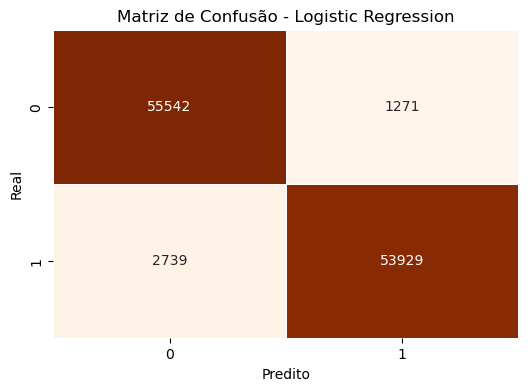

In [64]:
plot_confusion_matrix(predictions_lr, "Logistic Regression")

### Decision tree classifier → Classificador de Árvore de Decisão

Criar o modelo de árvore de decisão
<img src="../img/1_xGsYc6aXehD7lyoLEn-mMA.png" width="300"/>

In [65]:
dt = DecisionTreeClassifier(featuresCol="features", labelCol="Class")

Construir o pipeline para a árvore de decisão

In [66]:
pipeline_dt = Pipeline(stages=[assembler, dt])

Treinar o modelo

In [67]:
model_dt = pipeline_dt.fit(train_df)

Fazer previsões no conjunto de teste

In [68]:
predictions_dt = model_dt.transform(test_df)

Resultado

In [69]:
precision_dt = precision_evaluator.evaluate(predictions_dt)

In [70]:
print(f"Precisão (Decision Tree): {precision_dt}")

Precisão (Decision Tree): 0.9603762937859811


/usr/local/spark/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


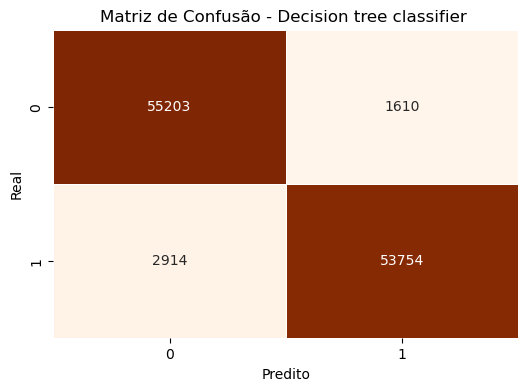

In [71]:
plot_confusion_matrix(predictions_dt, "Decision tree classifier ")

### Random Forest Classifier → Classificador de Floresta Aleatória

Criar o modelo de Random Forest
<img src="../img/1_R3oJiyaQwyLUyLZL-scDpw.png" width="300"/>

In [72]:
rf = RandomForestClassifier(featuresCol = "features", labelCol = "Class", numTrees = 100)

Construir o pipeline para o Random Forest

In [73]:
pipeline_rf = Pipeline(stages=[assembler, rf])

Treinar modelo

In [74]:
model_rf = pipeline_rf.fit(train_df)

Fazer previsões do conjunto de teste

In [75]:
predictions_rf = model_rf.transform(test_df)

Resultado

In [76]:
precision_rf = precision_evaluator.evaluate(predictions_rf)

In [77]:
print(f"Precisão (Random Forest): {precision_rf}")

Precisão (Random Forest): 0.9578710798430294


/usr/local/spark/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


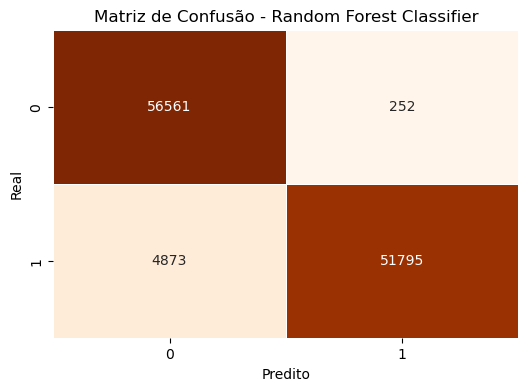

In [78]:
plot_confusion_matrix(predictions_rf, "Random Forest Classifier")

### Gradient-boosted Tree Classifier → Classificador de Árvore com Boosting de Gradiente

Criar modelo de Gradient-Boosted Tree

In [79]:
gbt = GBTClassifier(featuresCol = "features", labelCol = "Class", maxIter = 100)

Construir o pipeline para o Gradient-Boosted Tree

In [80]:
pipeline_gbt = Pipeline(stages = [assembler, gbt])

Treinar modelo


In [81]:
model_gbt = pipeline_gbt.fit(train_df)

Fazer previsões no conjunto de teste

In [82]:
predictions_gbt = model_gbt.transform(test_df)

Resultado

In [83]:
precision_gbt = precision_evaluator.evaluate(predictions_gbt)

In [84]:
print(f"Precisão (Gradient-Boosted Tree): {precision_gbt}")

Precisão (Gradient-Boosted Tree): 0.9870681387844105


/usr/local/spark/python/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


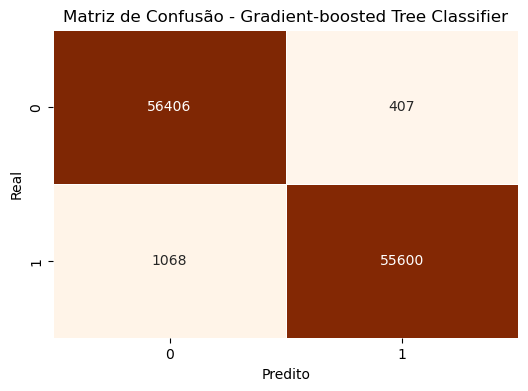

In [85]:
plot_confusion_matrix(predictions_gbt, "Gradient-boosted Tree Classifier")